## Solving bidomain equations on rectangular domain with Beeler-Reuter model

### Importing required libraries

In [1]:
%cd ../../..
from src.models.dynamics_models import *
from src.models.cell_models import *
from src.utils import *
import ufl

/home/drvinko/Desktop/Modeliranje-biofizike-srcanog-tkiva


### Defining a domain, cell model and dynamics model and visualizing initial data

In [2]:
domain = rectangle(3, 1, 50, 25)
x = ufl.SpatialCoordinate(domain)

In [3]:
class Model(BidomainModel):
    def initial_V_m(self):
        self.V_m_n.x.array[:] = -85
        locator = lambda x: x[0] < 0.2
        cells = fem.locate_dofs_geometrical(self.V1, locator)
        self.V_m_n.x.array[cells] = np.full_like(cells, -50)

    def conductivity(self):
        # Muscle fibres
        self.fibers = ufl.as_vector(
            [x[1] ** 2 / ufl.sqrt((x[1] ** 4 + 1)), 1 / ufl.sqrt((x[1] ** 4 + 1))]
        )

        # Healthy conductivities
        self.M_i = self.SIGMA_IT * ufl.Identity(2) + (
            self.SIGMA_IL - self.SIGMA_IT
        ) * ufl.outer(self.fibers, self.fibers)
        self.M_e = self.SIGMA_ET * ufl.Identity(2) + (
            self.SIGMA_EL - self.SIGMA_ET
        ) * ufl.outer(self.fibers, self.fibers)

In [4]:
cell_model = BeelerReuter(domain)
model = Model(domain, cell_model)

In [5]:
model.plot_initial_V_m(camera_direction="xy", function_name="")

Widget(value='<iframe src="http://localhost:33299/index.html?ui=P_0x7f5fad3c9610_0&reconnect=auto" class="pyvi…

### Solving equations with given parameters

In [6]:
model.solve(
    T=500,
    steps=10000,
    save_to="rectangle/bidomain_BR.mp4",
    signal_point=[1.0, 0.5, 0.0],
    camera_direction="xy",
    checkpoints=[100, 200, 300, 400, 500],
    checkpoint_file="figures/rectangle/bidomain_BR",
)

Solving problem: 100%|██████████| 10000/10000 [47:15<00:00,  3.53it/s] 


### Plotting a fiber orientations

In [7]:
plot_vector_field(
    domain,
    lambda x: [x[1] ** 2 / np.sqrt((x[1] ** 4 + 1)), 1 / np.sqrt((x[1] ** 4 + 1)), 0],
    0.03,
    0.2,
    camera_direction="xy",
)

Widget(value='<iframe src="http://localhost:33299/index.html?ui=P_0x7f5fc7880710_1&reconnect=auto" class="pyvi…

### Plotting a final plot of transmembrane potential

In [8]:
plot_function(model.V_m_n, "V_m", show_mesh=False)

Widget(value='<iframe src="http://localhost:33299/index.html?ui=P_0x7f5fc7880190_2&reconnect=auto" class="pyvi…

### Plotting a transmembrane potential in a given signal point

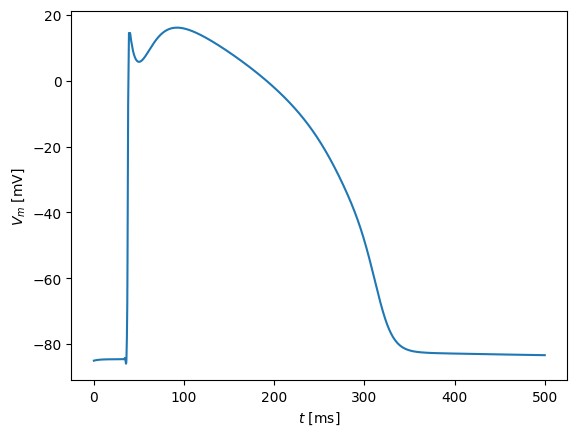

ERROR:wslink.protocol:Exception raised
ERROR:wslink.protocol:KeyError('982fa49f65795478b32c76b6132b5845_5151d')
ERROR:wslink.protocol:Traceback (most recent call last):
  File "/home/drvinko/miniconda3/envs/diplomski/lib/python3.11/site-packages/wslink/protocol.py", line 332, in onMessage
    results = func(*args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^
  File "/home/drvinko/miniconda3/envs/diplomski/lib/python3.11/site-packages/trame_vtk/modules/vtk/protocols/local_rendering.py", line 33, in get_array
    self.context.get_cached_data_array(data_hash, binary)
  File "/home/drvinko/miniconda3/envs/diplomski/lib/python3.11/site-packages/trame_vtk/modules/vtk/serializers/synchronization_context.py", line 30, in get_cached_data_array
    cache_obj = self.data_array_cache[p_md5]
                ~~~~~~~~~~~~~~~~~~~~~^^^^^^^
KeyError: '982fa49f65795478b32c76b6132b5845_5151d'



In [9]:
model.plot_signal()